Found 139 .tif files in the directory ../data/training.
I;16B

Metadata for 039.tif:
No metadata available.
I;16B

Metadata for 221.tif:
No metadata available.
I;16B

Metadata for 127.tif:
No metadata available.
I;16B

Metadata for 051.tif:
No metadata available.
I;16B

Metadata for 065.tif:
No metadata available.


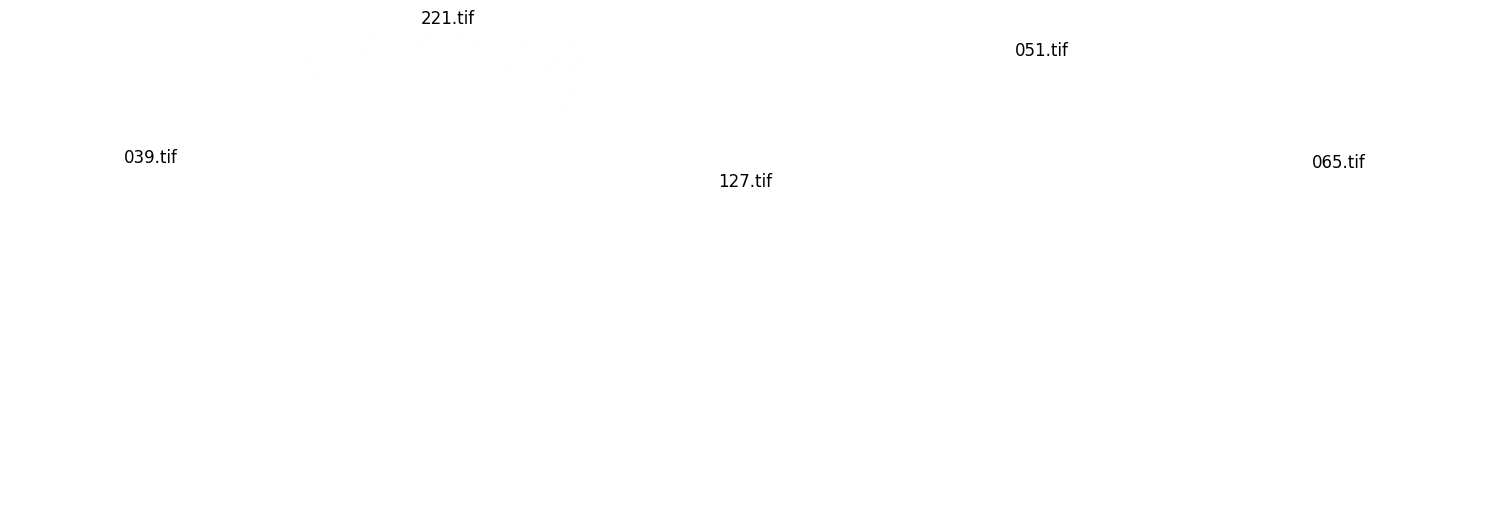

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to your training folder
data_dir = "../data/training"

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# Get a list of all .tif files in the training directory
tif_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]

# Print a message if no .tif files are found
if not tif_files:
    print(f"No .tif files found in the directory {data_dir}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {data_dir}.")

# Determine the number of images to display (maximum of 5 for layout clarity)
num_images = min(5, len(tif_files))

# Initialize a figure for displaying images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) if num_images > 1 else (plt.subplots(figsize=(5, 5))[1],)

# Process each .tif file (limiting to the first few if many images)
for idx, tif_file in enumerate(tif_files[:num_images]):
    # Open the image
    file_path = os.path.join(data_dir, tif_file)
    image = Image.open(file_path)
    
    # Convert image to RGB if not already in a compatible mode
    print(image.mode)
    if image.mode not in ("RGB", "RGBA"):
        image = image.convert("RGB")
    
    # Print metadata for each file
    print(f"\nMetadata for {tif_file}:")
    if hasattr(image, 'tag_v2'):  # Check if image has 'tag_v2' attribute
        for tag, value in image.tag_v2.items():
            print(f"{tag}: {value}")
    else:
        print("No metadata available.")

    # Plot the image in the subplot
    ax = axes[idx] if num_images > 1 else axes
    ax.imshow(image)
    ax.set_title(tif_file)
    ax.axis('off')  # Turn off axis

# Adjust layout to avoid overlap and show all images
plt.tight_layout()
plt.show()
